<a href="https://colab.research.google.com/github/nueveonce/ProyectoCarbono/blob/main/Proyecto_Carbono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO HUELLA DE CARBONO


# Importación de librerias

In [34]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

try:
    print("Intentando cargar el DataFrame...")
    start_time = time.time()

    ruta = '/content/drive/MyDrive/Colab'+' '+'Notebooks/Datasets/carbono_emisiones_por_pais.csv'
    df = pd.read_csv(ruta, sep=",")

    print(f"Carga exitosa! Tiempo: {time.time()-start_time:.2f} segundos")

except FileNotFoundError:
    print("ERROR: Archivo no encontrado. Verifica la ruta.")
    print(ruta)
except Exception as e:
    print(f"ERROR inesperado: {str(e)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Intentando cargar el DataFrame...
Carga exitosa! Tiempo: 0.01 segundos


# Acerca del dataset
Acerca del conjunto de datos
Este conjunto de datos proporciona una visión completa de las emisiones de dióxido de carbono (CO₂) país por país, lo que permite analizar tanto las tendencias históricas como la evolución reciente de las emisiones mundiales. Procedente de data.gov.in y seleccionado para mayor precisión y facilidad de uso, este conjunto de datos incluye datos de emisiones anuales para numerosos países, clasificados por año y región.

### Descripciones de cada una de las columnas del conjunto de datos:

**País:** El nombre del país para el que se registran los datos de emisiones de CO₂. Esta columna permite el análisis y la comparación específicos de cada país.

**Región:** La región geográfica o administrativa a la que pertenece cada país. Esta categorización facilita el análisis regional al agrupar a los países en áreas más amplias, como continentes o zonas económicas.

**Fecha:** El año en el que se registraron los datos de emisiones de CO₂, formateado como una fecha para la compatibilidad con el análisis de series temporales y para permitir identificar las tendencias temporales.

**Kilotones de CO₂:** La cantidad total de emisiones de dióxido de carbono, medida en kilotones, liberadas por cada país en el año especificado. Esta columna proporciona una medida cuantitativa de las emisiones nacionales de CO₂.

**Toneladas métricas per cápita:** Las emisiones de CO₂ per cápita de cada país, expresadas en toneladas métricas. Este valor representa las emisiones medias de dióxido de carbono por persona, lo que ofrece información sobre las contribuciones de las emisiones individuales en relación con el tamaño de la población.

Estas descripciones de columna resaltan el propósito de cada campo, lo que facilita la interpretación del conjunto de datos y su utilización eficaz en sus análisis.

### Características principales:

**Datos a nivel de país:** Cubre los datos de emisiones de CO₂ por países individuales, lo que permite comparaciones entre países y análisis regionales.

**Series temporales:** Los registros anuales de emisiones proporcionan una vista de series temporales, lo que los hace ideales para identificar tendencias, picos y patrones a lo largo del tiempo.

**Contexto regional:** La adición de una columna "Región" permite a los usuarios agrupar países en regiones específicas, lo que facilita un análisis y una comparación regionales más amplios.

**Usabilidad mejorada:** La columna "Año" se ha convertido a un formato de fecha para admitir análisis basados en el tiempo, y se han aplicado transformaciones de datos adicionales para mayor claridad.

**Casos de uso:**
Este conjunto de datos es valioso para investigadores ambientales, científicos de datos, responsables políticos y cualquier persona interesada en estudiar los patrones de emisiones de carbono, analizar el impacto del cambio climático o modelar escenarios futuros de emisiones de CO₂. Admite una amplia gama de análisis, desde visualizaciones simples hasta modelos estadísticos complejos.

Agradecimientos:
Nos gustaría expresar nuestra gratitud a las bibliotecas Python Request, HTML y beautifulsoup por su invaluable contribución al proceso de generación de conjuntos de datos.

Nota:
Tenga en cuenta que los ejemplos proporcionados se han extraído de Internet (https://www.macrotrends.net/) y con fines ilustrativos.

## 1.1: Exploración inicial

In [35]:
# Mostrar las primeras 5 filas del DataFrame
print("Primeras 5 filas del DataFrame:")
df.head()

Primeras 5 filas del DataFrame:


,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [36]:
# Mostrar las últimas 5 filas del DataFrame
print("\nÚltimas 5 filas del DataFrame:")
df.tail()


Últimas 5 filas del DataFrame:


,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61
5676,Zimbabwe,Africa,01-01-2008,7600.0,0.61


In [37]:
# Obtener un resumen estadístico de las columnas numéricas
print("\nResumen estadístico de las columnas numéricas:")
df.describe().T



Resumen estadístico de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Kilotons of Co2,5677.0,141229.164974,649125.822199,0.0,1380.00,9170.00,58480.00,10707219.73
Metric Tons Per Capita,5677.0,4.325505,5.503834,0.0,0.57,2.36,6.34,47.65


In [38]:
# Obtener un resumen de la información del DataFrame (número de entradas, columnas, tipo de datos, valores no nulos)
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


##  1.2: Data Wrangling
En esta fase, nos centraremos en verificar la calidad de nuestros datos, específicamente en la detección y manejo de valores nulos y duplicados. Estos son pasos cruciales para asegurar que nuestros análisis posteriores sean precisos y fiables.

En esta etapa, vamos a:

* Identificar la presencia de valores nulos (NaN).
* Manejar los valores nulos.
* Verificar la existencia de filas duplicadas.

### Identificar valores nulos

Para este proyecto, y dada la naturaleza del dataset (series temporales por país), consideraremos dos estrategias iniciales para manejar los valores nulos en las columnas de años:

Opción A: Eliminar filas con muchos nulos. Si un país tiene una gran cantidad de años sin datos, quizás no sea representativo para el análisis.

Opción B: Imputar valores. Rellenar los valores nulos con una estimación (ej. la media, mediana, o incluso una interpolación). Para este dataset, la interpolación lineal podría ser muy útil para rellenar huecos en las series temporales de un mismo país, asumiendo una tendencia lineal entre los puntos de datos existentes.

In [39]:
# Contar el número de valores nulos por columna
print("Número de valores nulos por columna:")
print(df.isnull().sum())

# Opcional: Mostrar el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)

Número de valores nulos por columna:
Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64

Porcentaje de valores nulos por columna:
Country                   0.0
Region                    0.0
Date                      0.0
Kilotons of Co2           0.0
Metric Tons Per Capita    0.0
dtype: float64


In [40]:
# Identificar las columnas de años (ej. del 1990 al 2022)
# Basado en la exploración de la Fase 1.1, asumo que las columnas de años comienzan después de la columna 'Country'
# Por favor, ajusta esto si tus columnas de años tienen otro prefijo o rango.
# Para este ejemplo, asumamos que las columnas de años son todas las que no son 'Country'

#year_columns = df.columns.drop('Country') # Ajusta 'Country' si el nombre es diferente

# Aplicar interpolación lineal para rellenar valores nulos
# Se aplica por fila (país), por lo que rellenará huecos en la serie de tiempo de cada país

#df_interpolated = df.copy() # Creamos una copia para no modificar el DataFrame original directamente al principio
#df_interpolated[year_columns] = df_interpolated[year_columns].T.interpolate(method='linear', limit_direction='both').T

# Después de la interpolación, verifica si aún quedan nulos (ej. si un país tiene nulos al principio o al final de su serie sin datos para interpolar)

#print("\nNúmero de valores nulos por columna después de la interpolación:")
#print(df_interpolated.isnull().sum())

# Opcional: Si después de la interpolación quedan muchos nulos en algunas filas (países),
# podríamos considerar eliminarlas. Por ejemplo, eliminar filas donde el porcentaje de nulos
# en las columnas de años es mayor a un umbral (ej. 50%)
# umbral_nulos = 0.5 * len(year_columns) # 50% de las columnas de años
# df_cleaned = df_interpolated.dropna(thresh=len(year_columns) - umbral_nulos, subset=year_columns)
# print(f"\nDimensiones del DataFrame después de eliminar filas con más del 50% de nulos en años: {df_cleaned.shape}")

### Verificar Duplicados

In [41]:
# Contar el número de filas duplicadas
num_duplicates = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {num_duplicates}")

# Si hay duplicados, se pueden eliminar (generalmente se mantiene la primera ocurrencia)
if num_duplicates > 0:
    df_cleaned = df.drop_duplicates().reset_index(drop=True)
    print(f"Dimensiones del DataFrame después de eliminar duplicados: {df_cleaned.shape}")
else:
    df_cleaned = df.copy() # Si no hay duplicados, simplemente usamos la copia interpolada

# Asignar el DataFrame final limpiado para las siguientes fases
df = df_cleaned


Número de filas duplicadas: 0


### Cambio de tipo de datos

In [42]:
import pandas as pd # Asegurarnos de que pandas esté importado

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verificar el tipo de dato
print("\nTipo de dato de la columna 'Date' después de la conversión:")
print(df['Date'].dtype)

# Extraer el año para facilitar el análisis posterior si es necesario
df['Year'] = df['Date'].dt.year



Tipo de dato de la columna 'Date' después de la conversión:
datetime64[ns]


## Fase 1.3: Análisis Exploratorio de Datos (EDA).

### Estadísticas Descriptivas de las métricas de emisión

In [43]:
print("\nEstadísticas descriptivas para 'Kilotons of Co2':")
print(df['Kilotons of Co2'].describe().T)

print("\nEstadísticas descriptivas para 'Metric Tons Per Capita':")
print(df['Metric Tons Per Capita'].describe().T)


Estadísticas descriptivas para 'Kilotons of Co2':
count    5.677000e+03
mean     1.412292e+05
std      6.491258e+05
min      0.000000e+00
25%      1.380000e+03
50%      9.170000e+03
75%      5.848000e+04
max      1.070722e+07
Name: Kilotons of Co2, dtype: float64

Estadísticas descriptivas para 'Metric Tons Per Capita':
count    5677.000000
mean        4.325505
std         5.503834
min         0.000000
25%         0.570000
50%         2.360000
75%         6.340000
max        47.650000
Name: Metric Tons Per Capita, dtype: float64


**Interpretación:**

* Estadísticas de Kilotons of Co2:
La media (1.4×10
5
 ) y la desviación estándar (6.4×10
5
 ) muestran una gran dispersión en los datos. Esto es típico de las emisiones de CO2, donde algunos países (grandes economías) emiten muchísimo más que otros.

* La diferencia entre el 75% (5.8×10
4
 ) y el máximo (1.07×10
7
 ) es enorme, lo que sugiere la presencia de valores atípicos (outliers), es decir, países con emisiones extremadamente altas. Esto es algo que buscaremos en la fase de detección de outliers.

* Estadísticas de Metric Tons Per Capita:
También muestra una dispersión considerable, aunque no tan extrema como los kilotones.

* El máximo de 47.65 toneladas per cápita es bastante alto, lo que indica algunos países con emisiones per cápita muy elevadas.

### Análisis de tendencias por año

In [47]:
# Agrupar por año y sumar las emisiones
emissions_by_year = df.groupby('Year')['Kilotons of Co2'].sum().reset_index()

# Ordenar por año
emissions_by_year = emissions_by_year.sort_values(by='Year')
print("\n Emisiones totales de CO2 por año:")
print(emissions_by_year)


 Emisiones totales de CO2 por año:
    Year  Kilotons of Co2
0   1990      20341800.00
1   1991      20482540.00
2   1992      20513040.00
3   1993      20651120.00
4   1994      20765250.00
5   1995      21356750.00
6   1996      21807640.00
7   1997      22183020.00
8   1998      22303000.00
9   1999      22406130.00
10  2000      23123390.00
11  2001      23518340.00
12  2002      23833349.80
13  2003      24939900.31
14  2004      26073289.89
15  2005      27039670.03
16  2006      27916500.20
17  2007      28968049.92
18  2008      29191159.84
19  2009      28867640.01
20  2010      30619529.64
21  2011      31584239.82
22  2012      32015620.18
23  2013      32665170.52
24  2014      32742940.00
25  2015      32541869.55
26  2016      32564800.27
27  2017      33053139.82
28  2018      33817899.77
29  2019      33871179.99


### Análisis de tendencias por país

In [45]:
# Seleccionar algunos países para visualización
# Podemos tomar los países con mayores emisiones promedio o simplemente algunos conocidos
top_emission_countries = df.groupby('Country')['Kilotons of Co2'].sum().nlargest(5).index
print(f"\nPaíses con mayores emisiones totales: {list(top_emission_countries)}")

# Filtrar el DataFrame para estos países
df_top_countries = df[df['Country'].isin(top_emission_countries)]

# También podemos ver la cantidad de años que tiene cada país en el dataset
print("\nConteo de registros por país:")
print(df['Country'].value_counts())


Países con mayores emisiones totales: ['China', 'United States', 'Russia', 'India', 'Japan']

Conteo de registros por país:
Country
Afghanistan         30
Albania             30
Algeria             30
Andorra             30
Angola              30
                    ..
Micronesia          28
Marshall Islands    28
Mali                28
Palau               28
Timor-Leste         18
Name: count, Length: 190, dtype: int64


## 1.4 Visualizaciones

### Visualizar la Tendencia Global de Emisiones por Año

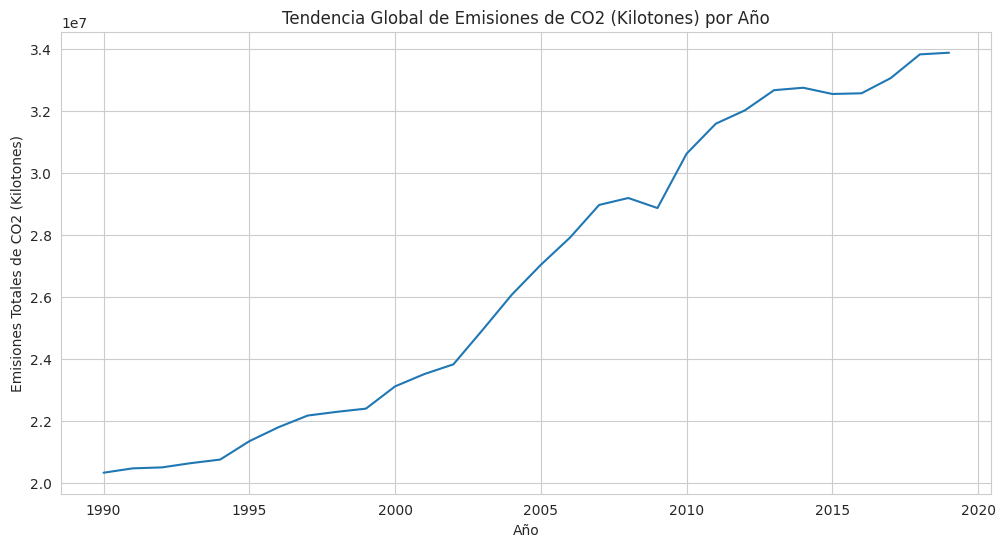

In [48]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Gráfico de la tendencia global de emisiones
plt.figure(figsize=(12, 6))
sns.lineplot(data=emissions_by_year, x='Year', y='Kilotons of Co2')
plt.title('Tendencia Global de Emisiones de CO2 (Kilotones) por Año')
plt.xlabel('Año')
plt.ylabel('Emisiones Totales de CO2 (Kilotones)')
plt.grid(True)
plt.show()

### Distribución de Kilotons of Co2 y Metric Tons Per Capita

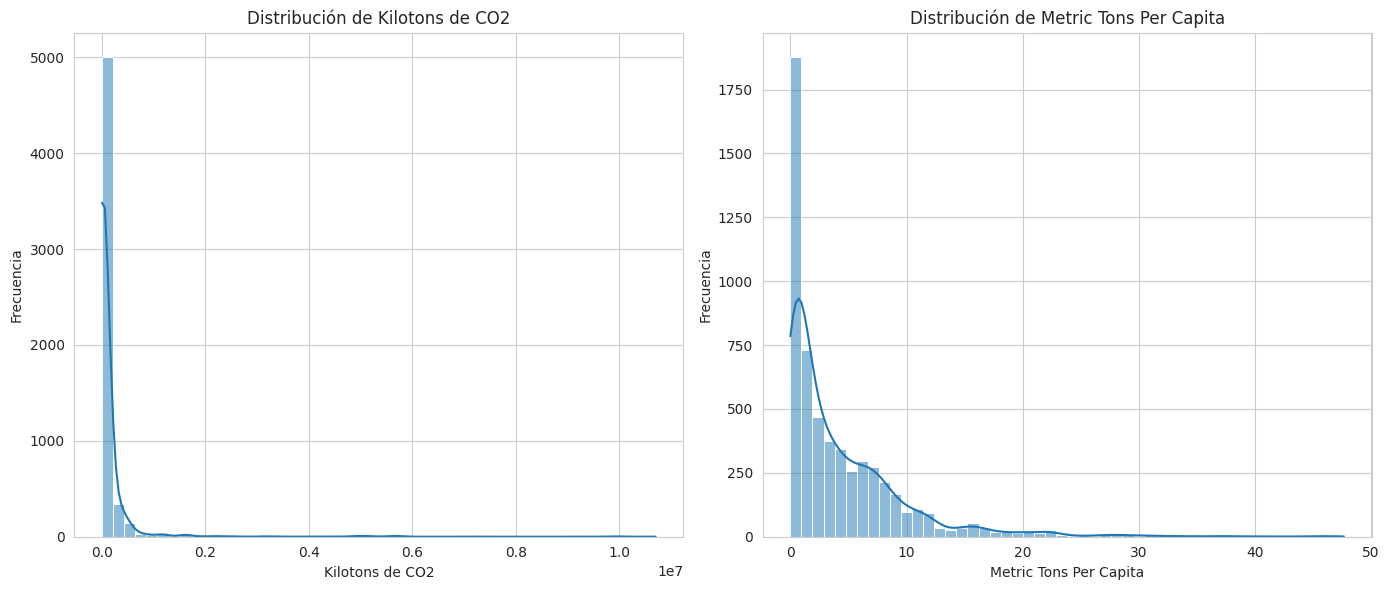

In [49]:
# Histograma para Kilotons of Co2
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.histplot(df['Kilotons of Co2'], bins=50, kde=True)
plt.title('Distribución de Kilotons de CO2')
plt.xlabel('Kilotons de CO2')
plt.ylabel('Frecuencia')

# Histograma para Metric Tons Per Capita
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.histplot(df['Metric Tons Per Capita'], bins=50, kde=True)
plt.title('Distribución de Metric Tons Per Capita')
plt.xlabel('Metric Tons Per Capita')
plt.ylabel('Frecuencia')

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

### Emisiones por Región (Promedio o Suma)

<ipython-input-50-6867b1bff537>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emissions_by_region, x='Kilotons of Co2', y='Region', palette='viridis')


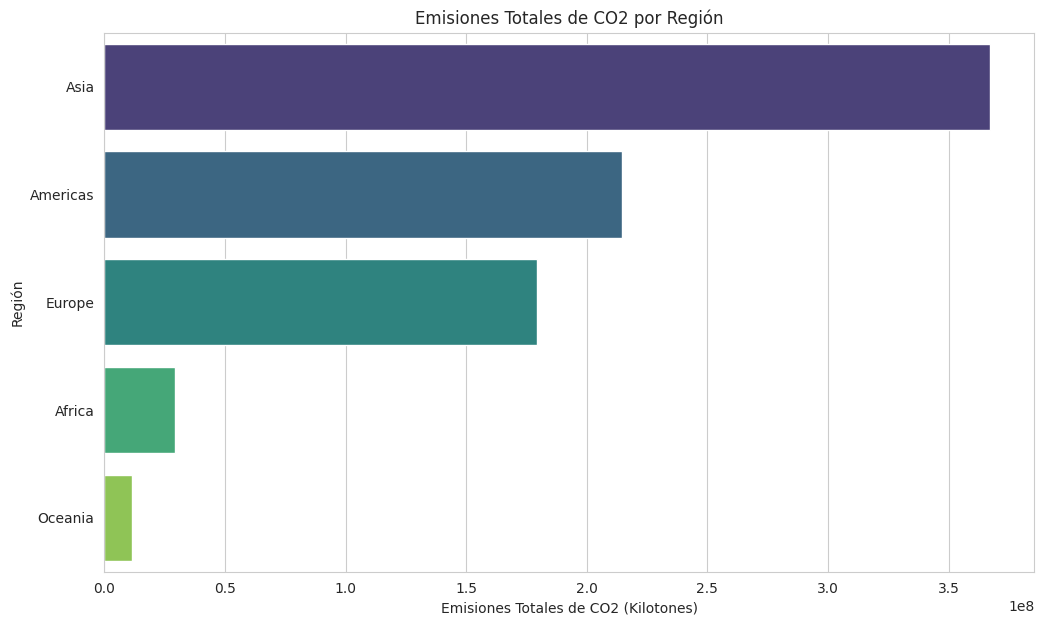

In [50]:
# Agrupar por región y calcular las emisiones promedio o totales (sumar)
# Usaremos la suma total de emisiones por región
emissions_by_region = df.groupby('Region')['Kilotons of Co2'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=emissions_by_region, x='Kilotons of Co2', y='Region', palette='viridis')
plt.title('Emisiones Totales de CO2 por Región')
plt.xlabel('Emisiones Totales de CO2 (Kilotones)')
plt.ylabel('Región')
plt.show()

### Relación entre Kilotons of Co2 y Metric Tons Per Capita

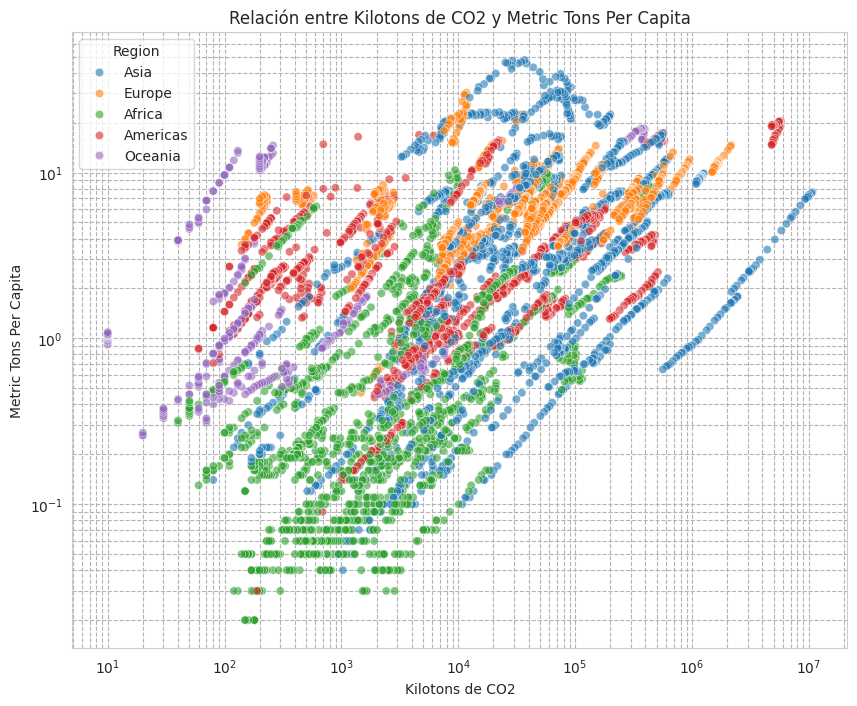

In [51]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Kilotons of Co2', y='Metric Tons Per Capita', alpha=0.6, hue='Region')
plt.title('Relación entre Kilotons de CO2 y Metric Tons Per Capita')
plt.xlabel('Kilotons de CO2')
plt.ylabel('Metric Tons Per Capita')
plt.xscale('log') # Usar escala logarítmica para Kilotons debido a la gran dispersión
plt.yscale('log') # Usar escala logarítmica para Metric Tons Per Capita también
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

## Fase 1.5: Detección de Outliers

 ### Usar Box Plots para Visualizar Outliers

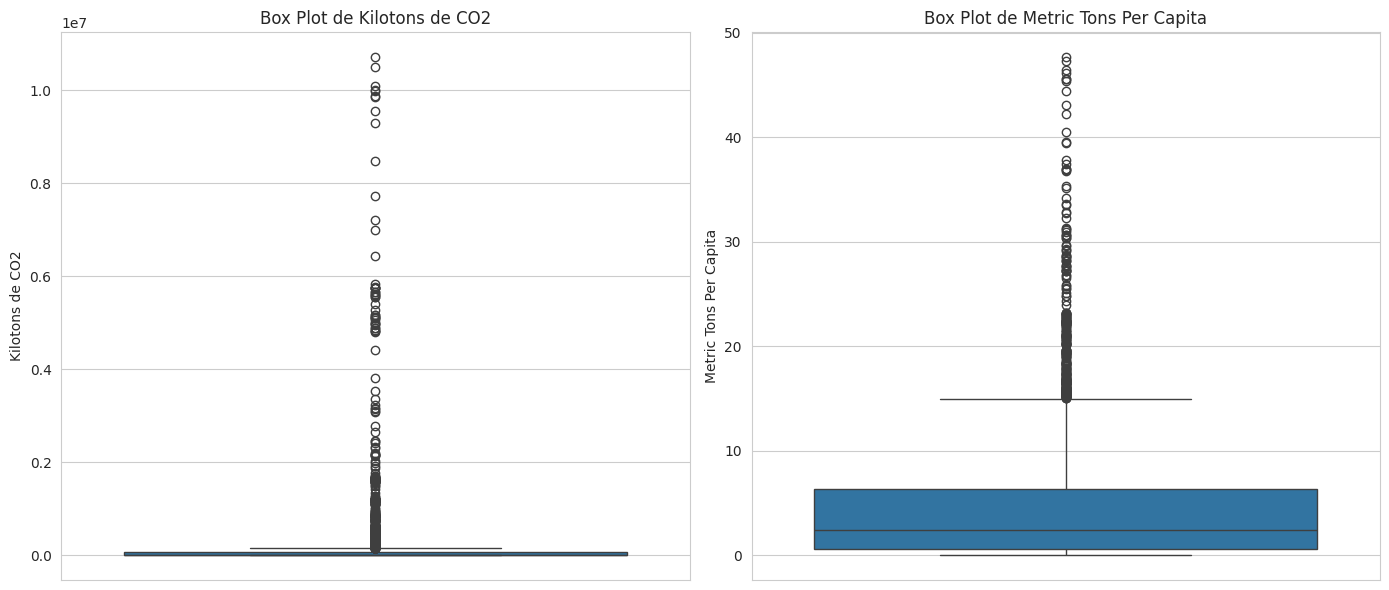

In [52]:
# Box plot para Kilotons of Co2
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.boxplot(y=df['Kilotons of Co2'])
plt.title('Box Plot de Kilotons de CO2')
plt.ylabel('Kilotons de CO2')

# Box plot para Metric Tons Per Capita
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.boxplot(y=df['Metric Tons Per Capita'])
plt.title('Box Plot de Metric Tons Per Capita')
plt.ylabel('Metric Tons Per Capita')

plt.tight_layout()
plt.show()

### Detección de Outliers usando el Método del Rango Intercuartílico (IQR)

In [53]:
# Función para detectar outliers usando IQR
def detect_outliers_iqr(df_column):
    Q1 = df_column.quantile(0.25)
    Q3 = df_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_column[(df_column < lower_bound) | (df_column > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detección de outliers para 'Kilotons of Co2'
outliers_kt, lower_kt, upper_kt = detect_outliers_iqr(df['Kilotons of Co2'])
print(f"\nOutliers detectados en 'Kilotons of Co2' (IQR): {len(outliers_kt)} valores")
print(f"Rango normal para Kilotons de CO2: [{lower_kt:.2f}, {upper_kt:.2f}]")
# Mostrar algunos de los outliers (los 10 mayores)
print("Top 10 Outliers (Kilotons of Co2):")
print(outliers_kt.nlargest(10))

# Detección de outliers para 'Metric Tons Per Capita'
outliers_mtpc, lower_mtpc, upper_mtpc = detect_outliers_iqr(df['Metric Tons Per Capita'])
print(f"\nOutliers detectados en 'Metric Tons Per Capita' (IQR): {len(outliers_mtpc)} valores")
print(f"Rango normal para Metric Tons Per Capita: [{lower_mtpc:.2f}, {upper_mtpc:.2f}]")
# Mostrar algunos de los outliers (los 10 mayores)
print("Top 10 Outliers (Metric Tons Per Capita):")
print(outliers_mtpc.nlargest(10))


Outliers detectados en 'Kilotons of Co2' (IQR): 839 valores
Rango normal para Kilotons de CO2: [-84270.00, 144130.00]
Top 10 Outliers (Kilotons of Co2):
1050    10707219.73
1051    10502929.69
1052    10096009.77
1053    10006669.92
1054     9984570.31
1055     9874660.16
1056     9861099.61
1057     9541870.12
1058     9282549.80
1059     8474919.92
Name: Kilotons of Co2, dtype: float64

Outliers detectados en 'Metric Tons Per Capita' (IQR): 288 valores
Rango normal para Metric Tons Per Capita: [-8.08, 14.99]
Top 10 Outliers (Metric Tons Per Capita):
4084    47.65
4087    47.29
4085    46.41
4091    46.11
4090    45.61
4086    45.57
4083    45.41
4088    44.37
4082    43.12
4089    42.20
Name: Metric Tons Per Capita, dtype: float64


### Discusión sobre el Manejo de Outliers (No los eliminaremos todavía)

# Reducción de Dimensionalidad con PCA.

## Pivotar el DataFrame para PCA

In [56]:
# Asegurarnos de que 'Year' esté disponible, lo creamos en la fase 1.3
df['Year'] = df['Date'].dt.year # Descomentar si no lo hiciste en la fase 1.3

# Pivotar el DataFrame:
# Index: Country
# Columns: Year
# Values: Kilotons of Co2 (promedio si hay múltiples entradas por país-año, aunque no debería haber)
df_pivot_kt = df.pivot_table(index='Country', columns='Year', values='Kilotons of Co2')

# Renombrar las columnas de Year (que son números) a strings si es necesario para evitar confusiones
df_pivot_kt.columns = [str(col) for col in df_pivot_kt.columns]


print("\nDimensiones del DataFrame pivotado:")
print(df_pivot_kt.shape)

# También verificar si hay nulos después del pivoteo (puede haber si algún país no tiene datos para todos los años)
print("\nValores nulos después del pivoteo (por año):")
print(df_pivot_kt.isnull().sum().sort_values(ascending=False).head())

# Vamos a imputar los valores nulos que puedan haber surgido por el pivoteo.
# Una estrategia común aquí es imputar con 0 (si un país no reporta, se asume 0 emisiones para ese año si es razonable)
# o con la media de ese año para otros países, o una interpolación lineal si los años son consecutivos.
# Para este caso, dado que es un proyecto de PCA y la ausencia de datos puede significar "no emisión" o "no reporte",
# una imputación simple podría ser la media de ese año para todos los países, o 0 si asumimos no emisión.
# Por simplicidad y dado que la ausencia podría significar baja/nula emisión en ese año para ese país,
# optaremos por rellenar con 0, pero es una decisión que debería ser justificada por el dominio.
df_pivot_kt.fillna(0, inplace=True) # Rellenar NaN con 0
print("\nValores nulos después de imputar con 0:")
print(df_pivot_kt.isnull().sum().sum()) # Debería ser 0
df_pivot_kt


Dimensiones del DataFrame pivotado:
(190, 30)

Valores nulos después del pivoteo (por año):
1990    6
1991    5
1998    2
1999    2
1992    1
dtype: int64

Valores nulos después de imputar con 0:
0


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2380.0,2230.0,1390.0,1340.0,1290.0,1240.0,1180.0,1100.0,1040.0,810.0,...,7110.00,8930.00,8080.00,5990.00,4880.00,5950.00,5300.00,4780.00,6070.00,6080.00
Albania,5980.0,4060.0,2220.0,2060.0,2070.0,1930.0,1940.0,1470.0,1790.0,2970.0,...,4450.00,4850.00,4360.00,4440.00,4820.00,4620.00,4480.00,5140.00,5110.00,4830.00
Algeria,62940.0,66430.0,66840.0,72220.0,73610.0,76440.0,76120.0,74430.0,74650.0,77510.0,...,114180.00,120790.00,134929.99,139020.00,147740.01,156270.00,154910.00,158340.00,165539.99,171250.00
Andorra,410.0,410.0,410.0,410.0,410.0,430.0,450.0,470.0,490.0,510.0,...,520.00,490.00,490.00,480.00,460.00,470.00,470.00,470.00,490.00,500.00
Angola,6560.0,6670.0,6880.0,9270.0,11300.0,12720.0,15440.0,16160.0,16770.0,17610.0,...,22800.00,23870.00,23870.00,26960.00,29630.00,31650.00,29760.00,24250.00,23960.00,25210.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,101630.0,100990.0,103110.0,107390.0,106530.0,114040.0,121840.0,127590.0,129300.0,125460.0,...,164100.01,160039.99,181130.00,180429.99,179240.01,163130.00,151070.01,140820.01,132130.00,112340.00
Vietnam,19330.0,19800.0,20810.0,24240.0,26680.0,31400.0,35030.0,40840.0,45470.0,46410.0,...,151410.00,155970.00,155520.00,164300.00,180870.00,220649.99,223720.00,230450.00,285600.01,336489.99
Yemen,6640.0,8500.0,9130.0,8550.0,9340.0,10530.0,10800.0,11640.0,12460.0,14060.0,...,25430.00,22950.00,21010.00,27830.00,27430.00,13550.00,10850.00,10010.00,9720.00,11100.00


## Escalado de Datos

In [57]:
from sklearn.preprocessing import StandardScaler

# Excluir la columna 'Country' del escalado, ya que es el índice
# Obtenemos solo las columnas numéricas que son los años
X = df_pivot_kt.values # Convertimos el DataFrame a un array NumPy

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

print("\nDimensiones de los datos escalados:")
print(X_scaled.shape)
print("\nPrimeras 5 filas de los datos escalados (ejemplo):")
print(X_scaled[:5, :5]) # Mostrar un fragmento


Dimensiones de los datos escalados:
(190, 30)

Primeras 5 filas de los datos escalados (ejemplo):
[[-0.24299102 -0.24462452 -0.24454979 -0.24110203 -0.24004934]
 [-0.2346346  -0.2403842  -0.24264522 -0.23948496 -0.23831567]
 [-0.10241746 -0.09586567 -0.0943642  -0.08190972 -0.07930637]
 [-0.24756384 -0.24884167 -0.24679856 -0.24319076 -0.24200529]
 [-0.23328828 -0.23433653 -0.2319521  -0.22329172 -0.21780049]]


## Aplicación de PCA

In [58]:
from sklearn.decomposition import PCA

# Instanciar el modelo PCA (sin especificar n_components para analizar la varianza explicada)
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(X_scaled)

# Varianza explicada por cada componente principal
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Varianza acumulada
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()
print("\nVarianza explicada acumulada:")
print(explained_variance_ratio_cumulative)


Varianza explicada por cada componente principal:
[9.28616103e-01 6.94219423e-02 1.65773413e-03 1.90939962e-04
 5.05966457e-05 1.63889938e-05 1.25071259e-05 7.07043082e-06
 5.73550915e-06 4.34611411e-06 3.18458002e-06 2.45023861e-06
 2.20327003e-06 1.76728418e-06 1.44269724e-06 1.02022592e-06
 9.00078365e-07 7.17232214e-07 5.47484526e-07 4.99496122e-07
 4.04416105e-07 2.88355526e-07 2.40133791e-07 2.07224973e-07
 1.93216735e-07 1.79424565e-07 1.53041328e-07 1.01439611e-07
 8.91384600e-08 4.68515744e-08]

Varianza explicada acumulada:
[0.9286161  0.99803805 0.99969578 0.99988672 0.99993732 0.9999537
 0.99996621 0.99997328 0.99997902 0.99998336 0.99998655 0.999989
 0.9999912  0.99999297 0.99999441 0.99999543 0.99999633 0.99999705
 0.9999976  0.9999981  0.9999985  0.99999879 0.99999903 0.99999924
 0.99999943 0.99999961 0.99999976 0.99999986 0.99999995 1.        ]
